In [260]:
import pandas as pd
data = pd.read_table('/Users/linlin/Desktop/2023/121/hw4/problem1.tsv',names=['x','y'])

In [261]:
data.head()

,x,y
0,0.072435,0.004788
1,-0.093958,0.118346
2,1.637295,0.021868
3,0.266178,-0.042178
4,0.672105,-0.403411


In [262]:
import numpy as np

# (1) ${p}_{j|i}$ matrix

The rationale is that we try to obtain a low-dimensional representation (Q) of a 'true' high-dimensional distribution (P).  

And we minimize the Kullback-Leibler divergence KL(P||Q) of P given q. 

p is the generating distribution (true), q is the reference distribution (in lower dim).   
  

In [290]:
def Gker(j,i,data=data,sigma2=[1 for i in range(200)]):
# compute caussian kernels
    x = data.x
    y = data.y
    if j == i:
        return 0
    dist = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
    num = np.exp(-dist/ (2*sigma2[i]))
    denom = 0
    for k in range(200):
        if k != i:
            distk = np.sqrt((x[i] - x[k])**2 + (y[i] - y[k])**2)
            denom += np.exp(-distk / (2*sigma2[i]))

    return num/denom


In [291]:
print(np.sum([Gker(j,0) for j in range(200)]))


1.0000000000000007


# (2) ${p}_{ji}$ matrix

made symmetric

In [292]:
def matp(data=data,sigma2=[1 for i in range(200)]):
    p_mat =  np.zeros((200,200))
    for i in range(200):
        for j in range(i,200):
            pji = Gker(j,i,data,sigma2)
            pij = Gker(i,j,data,sigma2)
            p_mat[i,j] = (pji + pij) / (2*200)
            p_mat[j,i] = p_mat[i,j]
    return p_mat


In [293]:
p_mat = matp()

In [297]:
p_mat

array([[0.00000000e+00, 8.25727263e-05, 4.79794657e-05, ...,
        9.03060080e-08, 1.66615022e-07, 5.29910484e-08],
       [8.25727263e-05, 0.00000000e+00, 4.42002915e-05, ...,
        8.77964573e-08, 1.66079339e-07, 5.21369312e-08],
       [4.79794657e-05, 4.42002915e-05, 0.00000000e+00, ...,
        1.84887548e-07, 2.91153736e-07, 1.03901174e-07],
       ...,
       [9.03060080e-08, 8.77964573e-08, 1.84887548e-07, ...,
        0.00000000e+00, 2.21785472e-05, 4.55741618e-05],
       [1.66615022e-07, 1.66079339e-07, 2.91153736e-07, ...,
        2.21785472e-05, 0.00000000e+00, 3.14083106e-05],
       [5.29910484e-08, 5.21369312e-08, 1.03901174e-07, ...,
        4.55741618e-05, 3.14083106e-05, 0.00000000e+00]])

In [298]:
#sanity check, whole matrix sum to 1
print(p_mat.sum())


0.9999999999999999


# (3) plotting clusters 

In [269]:
from matplotlib import pyplot as plt

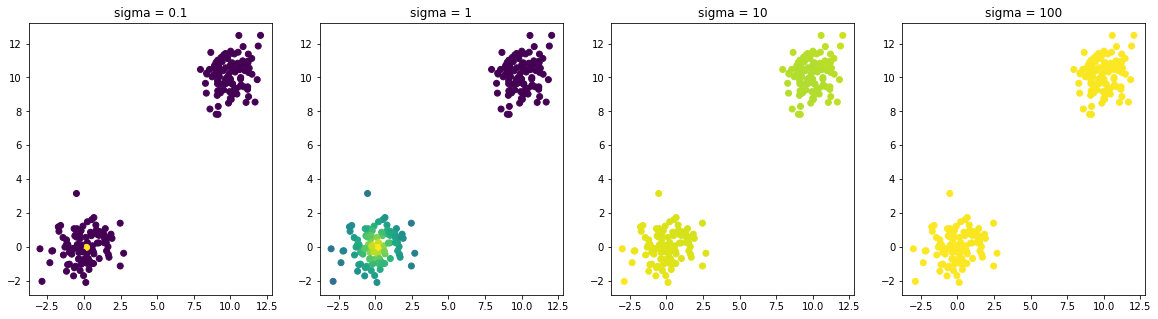

In [270]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
sigs = [0.1,1,10,100]
for idx in range(len(sigs)):
    sigma2 = [sigs[idx] for i in range(200)]
    p_mat = matp(sigma2 = sigma2)
    colorsp = p_mat[0,:]/p_mat[0:,].max()
    ax[idx].scatter(data.x,data.y,c=colorsp)
    ax[idx].set_title('sigma = '+str(sigs[idx]))
    

# (4) ${q}_{ij}$ matrix



In [284]:
def matq(x=data.x,y=data.y,sigma2=[1 for i in range(200)]):

    denom = 0
    for k in range(200):
        for l in range(200):
            if k != l:
                dist = np.sqrt((x[k] - x[l])**2 + (y[k] - y[l])**2)
                denom += 1 / (1 + dist)

    q_mat = np.zeros((200,200))
    for i in range(200):
        for j in range(200):
            if j != i:
                d = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
                num = 1 / (1 + d )
                q_mat[i,j] = num/denom
    return q_mat

In [287]:
q_mat = matq()

In [288]:
q_mat

array([[0.00000000e+00, 8.82617707e-05, 4.13427350e-05, ...,
        6.95203524e-06, 7.52120099e-06, 6.64440344e-06],
       [8.82617707e-05, 0.00000000e+00, 3.87873100e-05, ...,
        6.92436983e-06, 7.51541264e-06, 6.62862997e-06],
       [4.13427350e-05, 3.87873100e-05, 0.00000000e+00, ...,
        7.54595582e-06, 8.02883233e-06, 7.12249356e-06],
       ...,
       [6.95203524e-06, 6.92436983e-06, 7.54595582e-06, ...,
        0.00000000e+00, 2.27886164e-05, 3.71383074e-05],
       [7.52120099e-06, 7.51541264e-06, 8.02883233e-06, ...,
        2.27886164e-05, 0.00000000e+00, 2.89035543e-05],
       [6.64440344e-06, 6.62862997e-06, 7.12249356e-06, ...,
        3.71383074e-05, 2.89035543e-05, 0.00000000e+00]])

In [289]:
# sanity check, whole matrix sums to 1
print(q_mat.sum())

0.9999999999999958


# (5) plotting qij


Text(0.5, 1.0, 'sigma = 1, q_1j based')

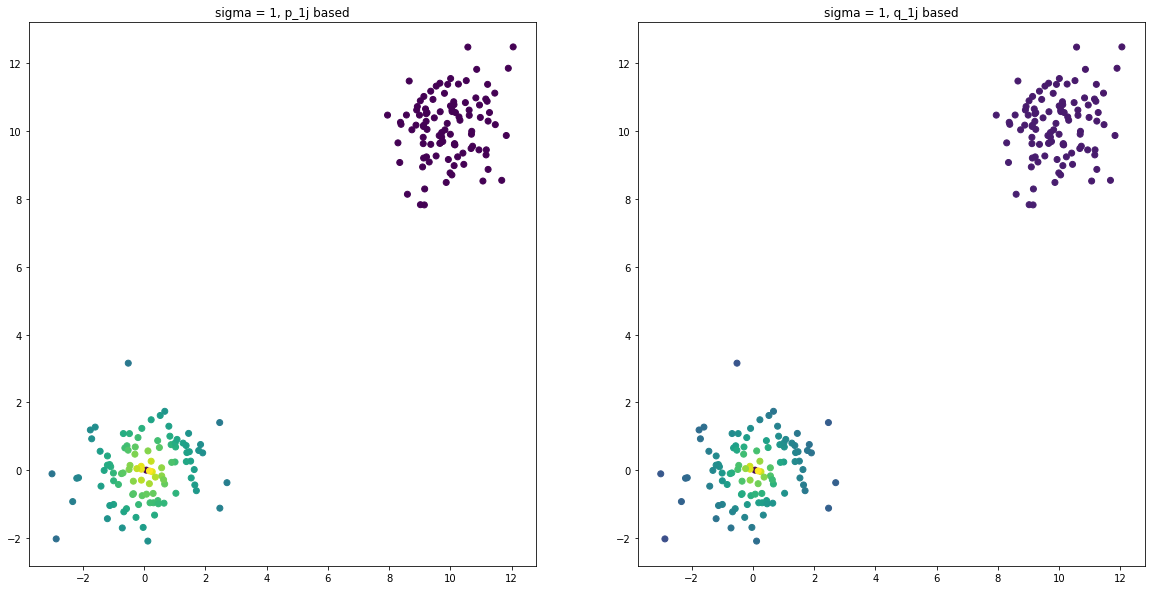

In [275]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sigma2 = [1 for i in range(200)]
p_mat = matp(sigma2 = sigma2)
colorsp = p_mat[0,:]/p_mat[0:,].max()
ax[0].scatter(data.x,data.y,c=colorsp)
ax[0].set_title('sigma = 1, p_1j based') 
q_mat = matq(data.x,data.y)
colorsq = q_mat[0,:]/q_mat[0:,].max()
ax[1].scatter(data.x,data.y,c=colorsq)
ax[1].set_title('sigma = 1, q_1j based')


Not very noticeable difference when the sigma-squared is 1. Indicating when the original data is projected using the identity, the low-dimensional dist Q is a good representation of the original dist P. 

# (6) KL Divergence 

In [295]:
def KLdiv(sigma2):
    s = 0
    p_mat = matp(sigma2 = sigma2)
    q_mat = matq()
    for i in range(200):
        for j in range(200):
            if i != j: #zero contribution when pij is 0, aka equal
                pij = p_mat[i,j]
                qij = q_mat[i,j]
                if pij != 0:
                    s += pij * np.log(pij / qij)
    return s


In [296]:
for sig in [0.1,1,100]:
    print('sig = '+str(sig)+' KLDiv: ',KLdiv(sigma2 = [sig for i in range(200)]))

sig = 0.1 KLDiv:  1.6009605945412078
sig = 1 KLDiv:  0.14738191957738475
sig = 100 KLDiv:  0.3701351686639759


sig = 0.1 KLDiv:  1.6009605945412078
sig = 1 KLDiv:  0.14738191957738475
sig = 100 KLDiv:  0.3701351686639759  

As the sigma^2 value increases, the KL Divergence does not necessarily increase/decrease.

# (7) Hyperparameters

There are two clusters here each generated based on normal distributions with different means. A smaller sigma-squared will results in the graph considering closer points as 'neighbors'  belonging to the same cluster, while a larger sigma-squared will tolerate further points as 'neighbors; which is why in the first graph, as sigma-squared gets larger, the faraway points (cluster) gets considered as neighbors and colored similarly.

However, by examining KL Divergence, which measures how different a distribution (P) is from another reference distribution (Q), it seems that sigma-squared = 1 is a more resonable sigma value. However, how we project P (the distribution of Q we came up with) would also affect the KL divergence calculation. 
